## Tugas 1
Buatlah model SVM dengan menggunakan data `voice.csv` dengan ketentuan,

**a.** Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
  - i. Gunakan model dengan kernel linier.
  - ii. Gunakan model dengan kernel polynomial.
  - iii. Gunakan model dengan kernel RBF.
  
**b.** Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

In [1]:
# Load dataset voice.csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load data
df = pd.read_csv('../Dataset/voice.csv')
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Preprocessing
X = df.drop('label', axis=1)
y = df['label']

# Encode label
le = LabelEncoder()
y = le.fit_transform(y)
print(f"\nLabel classes: {le.classes_}")
print(f"Encoded labels: {np.unique(y)}")

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeature matrix shape: {X_scaled.shape}")
print(f"Label vector shape: {y.shape}")

print("\n" + "="*80)
print("TUGAS 1: SVM DENGAN 3 KERNEL DAN 2 SPLIT RATIO")
print("="*80)

# Definisikan kernel dan split ratio
kernels = ['linear', 'poly', 'rbf']
split_ratios = [(0.7, 0.3), (0.8, 0.2)]

# Dictionary untuk menyimpan hasil
results = []

# Loop untuk setiap kombinasi kernel dan split ratio
for kernel in kernels:
    for train_ratio, test_ratio in split_ratios:
        print(f"\nTraining SVM dengan kernel={kernel}, split={int(train_ratio*100)}:{int(test_ratio*100)}")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, train_size=train_ratio, random_state=42, stratify=y
        )
        
        # Buat dan train model
        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=3, random_state=42)
        else:
            model = SVC(kernel=kernel, random_state=42)
        
        model.fit(X_train, y_train)
        
        # Prediksi
        y_pred = model.predict(X_test)
        
        # Hitung akurasi
        acc = accuracy_score(y_test, y_pred)
        
        print(f"Akurasi: {acc:.4f} ({acc*100:.2f}%)")
        
        # Simpan hasil
        results.append({
            'Kernel': kernel.upper(),
            'Split Ratio': f"{int(train_ratio*100)}:{int(test_ratio*100)}",
            'Train Size': len(X_train),
            'Test Size': len(X_test),
            'Accuracy': f"{acc:.4f}"
        })

# Tabulasi hasil
print("\n" + "="*80)
print("TABEL PERBANDINGAN PERFORMANSI")
print("="*80)

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

# Cari model terbaik
best_result = max(results, key=lambda x: float(x['Accuracy']))

print("\n" + "="*80)
print("MODEL TERBAIK:")
print("="*80)
print(f"Kernel: {best_result['Kernel']}")
print(f"Split Ratio: {best_result['Split Ratio']}")
print(f"Accuracy: {best_result['Accuracy']}")
print("="*80)

Dataset Overview:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.

## Tugas 2
Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

Loading dataset...
Dataset loaded: 240 samples, 768 features
Labels: ['day' 'night']
Encoded labels: ['day' 'night']

Train set: 192 samples
Test set: 48 samples

HYPERPARAMETER TUNING SVM RBF
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Dataset loaded: 240 samples, 768 features
Labels: ['day' 'night']
Encoded labels: ['day' 'night']

Train set: 192 samples
Test set: 48 samples

HYPERPARAMETER TUNING SVM RBF
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters: {'C': 1, 'gamma': 'scale'}
Best cross-validation score: 1.0000

Test Accuracy: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

         day       1.00      1.00      1.00        24
       night       1.00      1.00      1.00        24

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Best parameters: {'C': 1, 'gamma': 'scale'}

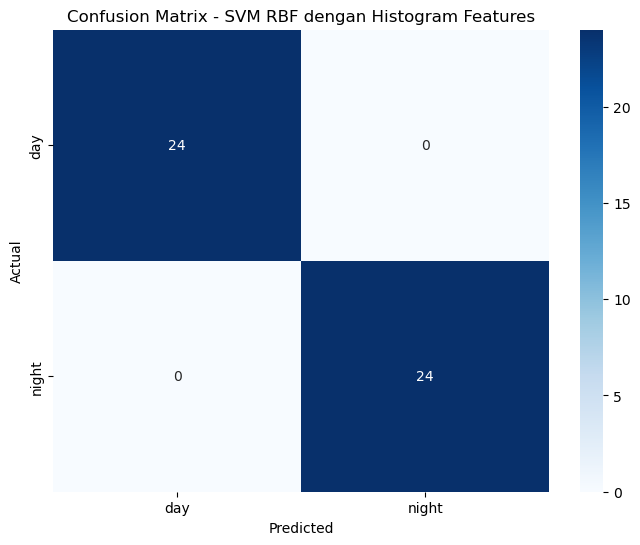


PERFORMANSI MODEL:
Model: SVM dengan kernel RBF
Fitur: Histogram (H,S,V channels)
Split ratio: 80:20
Hyperparameters: C=1, gamma=scale
Akurasi: 1.0000 (100.00%)


In [2]:
# TUGAS 2: KLASIFIKASI SIANG/MALAM DENGAN SVM RBF + HISTOGRAM FEATURES
import os
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(base_path):
    """Load dataset dari folder day dan night"""
    data = []
    labels = []
    
    for label in ['day', 'night']:
        folder_path = Path(base_path) / label
        if folder_path.exists():
            for img_path in folder_path.glob('*.jpg'):
                # Baca gambar
                img = cv2.imread(str(img_path))
                if img is not None:
                    # Ekstrak fitur histogram
                    hist_features = extract_histogram_features(img)
                    data.append(hist_features)
                    labels.append(label)
    
    return np.array(data), np.array(labels)

def extract_histogram_features(img):
    """Ekstrak fitur histogram dari gambar"""
    # Konversi ke HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Hitung histogram untuk setiap channel
    hist_h = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 256])
    
    # Normalisasi histogram
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()
    
    # Gabungkan semua fitur
    features = np.concatenate([hist_h, hist_s, hist_v])
    return features

# Load dataset
print("Loading dataset...")
dataset_path = "../Dataset/images/training"  # Path yang benar untuk dataset day/night
X, y = load_dataset(dataset_path)

print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Labels: {np.unique(y)}")

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Encoded labels: {le.classes_}")

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Hyperparameter tuning untuk SVM RBF
print("\n" + "="*80)
print("HYPERPARAMETER TUNING SVM RBF")
print("="*80)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svm_model = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train model dengan best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prediksi
y_pred = best_model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM RBF dengan Histogram Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n" + "="*80)
print("PERFORMANSI MODEL:")
print("="*80)
print(f"Model: SVM dengan kernel RBF")
print(f"Fitur: Histogram (H,S,V channels)")
print(f"Split ratio: 80:20")
print(f"Hyperparameters: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")
print(f"Akurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("="*80)